**Principal Component Analysis**

Principle Component Analysis is a Dimension reduction technique by which the data points are projected to some different dimension plane where the characteristics of the data are somehow retained but merged to reduce the number of the data components. This is an irreversible process so we cannot retrieve the exact data once PCA is applied.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
dataset = load_breast_cancer()

In [4]:
dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
X = pd.DataFrame(dataset.data,columns=dataset.feature_names)
Y = pd.DataFrame(dataset.target,columns=['Target'])

In [7]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [9]:
sc.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
Xscaled = sc.transform(X)

In [11]:
X.shape, Y.shape

((569, 30), (569, 1))

In [12]:
Xscaled.shape

(569, 30)

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

In [14]:
pca.fit(Xscaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [15]:
xpca = pca.transform(Xscaled)

In [16]:
xpca.shape

(569, 2)

Plot of the features after applying PCA

[]

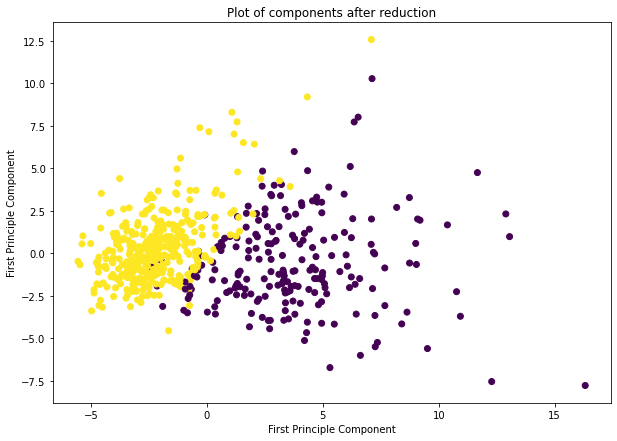

In [17]:
plt.figure(figsize=(10,7))
plt.scatter(xpca[:,0],xpca[:,1],c = dataset['target'])
plt.xlabel("First Principle Component")
plt.ylabel("First Principle Component")
plt.title("Plot of components after reduction")
plt.plot()

**Lets see how it affects the performance of the Logistic Regression model**

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

performance without dimension reduction

In [19]:
test_result = []

In [20]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(Xscaled,Y,test_size=0.3)

In [21]:
Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape

((398, 30), (171, 30), (398, 1), (171, 1))

In [22]:
lr = LogisticRegression()

In [23]:
lr.fit(Xtrain,Ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
test_result.append(["without PCA",lr.score(Xtest,Ytest)])

Performance after Dimension reduction

In [25]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(xpca,Y,test_size=0.3)
Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape

((398, 2), (171, 2), (398, 1), (171, 1))

In [26]:
lr = LogisticRegression()
lr.fit(Xtrain,Ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
test_result.append(["with PCA",lr.score(Xtest,Ytest)])

In [28]:
result = pd.DataFrame(test_result,columns=["type","accuracy score"])
result

,type,accuracy score
0,without PCA,0.976608
1,with PCA,0.982456


**Conclusion**

With PCA there is an increase in the performance of the model